<a href="https://colab.research.google.com/github/MohHasan1/Machine-Learning-Math/blob/main/01-Linear-Regression/Linear_Regression_Multiple_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
# Generate Data
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=500, n_features=10, n_informative=5, noise=2, random_state=0)
print(X.shape, y.shape)
n_features = X.shape[1]

(500, 10) (500,)


In [21]:
pd.DataFrame(X).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.62649,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.09815,0.655264


In [22]:
# Normalize (columns)
def normalize(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)

    return (X-u)/std

In [23]:
X = normalize(X)
pd.DataFrame(X).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702


In [24]:
X.mean(axis=0)

array([-2.75335310e-17,  5.82867088e-17, -1.06581410e-17, -1.39888101e-17,
        2.49800181e-18,  4.28546088e-17,  1.43635104e-17,  1.46549439e-17,
        7.14983628e-17, -1.07691633e-16])

In [25]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

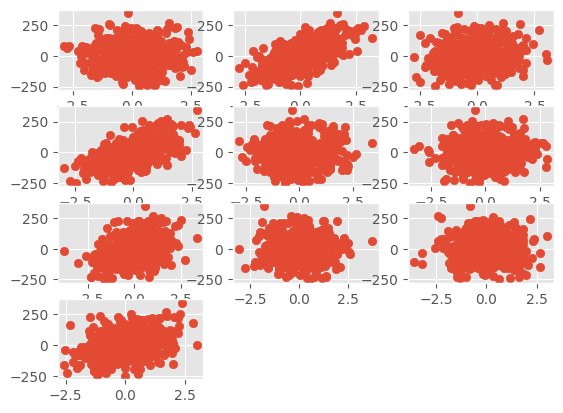

In [26]:
# Visualise y as function of each feature (column)

# target (y) vs each features
for f in range(0, 10):
    plt.subplot(4, 3, f+1) # f+1 is the sub-plot numbers (starts from 1)
    plt.scatter(X[:,f], y) # plot each feature columns
plt.show()

From the plots we can see some plots of target vs feature-column is not that infomative as they are neither going up or down.

So, their weights will be close to or equal 0.



In [28]:
# Train Test Split
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)

print(XT.shape, yT.shape) # train samples
print(Xt.shape, yt.shape) # test samples

(350, 10) (350,)
(150, 10) (150,)


In [29]:
# Util function
def preprocess(X):
    # add a column of 1s in X as 0th column
    if X.shape[1] == n_features:
        m = X.shape[0]
        ones = np.ones((m,1))
        X = np.hstack((ones,X))
    return X


In [30]:
# step-1: Hypothesis (prediction)

def hypothesis(X, theta): # features (x) and parameters (Q/theta)
    return np.dot(X,theta) # X = (m, f).theta = (f, 1) = (m, 1)

In [45]:
# step-2: Loss Function

def loss(X, y, theta):
    yp = hypothesis(X, theta) # prediction (m, 1)
    error = np.mean((yp-y)**2) # MSE (scaler value)
    return error # Scaler value

In [36]:
# step - 3: Gradient Descent - 1 (partial differentation)
def gradient(X, y, theta):
    yp = hypothesis(X, theta) # (m, 1)
    grad = np.dot(X.T, (yp-y)) # (f, m).(m, 1) = (f, 1)
    m = X.shape[0] # no. of samples
    return grad/m #  (f, 1)

# The derivation is on tablet (GoodNote)

In [48]:
# step - 3: Gradient Descent - 2 (Train)

def train(X, y, learning_rate=0.1, max_iters=100):
    n = X.shape[1] # features
    theta = np.random.randn(n) # random starting theta (f, 1)
    error_list = []

    for i in range(max_iters):
        e = loss(X, y, theta) # loss (MSE) - batch gradient in this case (scaler)
        error_list.append(e)

        grad = gradient(X, y, theta) # differentiation (f, 1)

        theta = theta - learning_rate*grad # (f, 1) - (f, 1) = (f, 1)

    plt.plot(error_list)
    # print(error_list)
    return theta

(350, 11) (150, 11)
[-3.83056390e+00 -2.14450779e-02  6.04372112e+01  1.06956695e+01
  6.35756270e+01 -3.59909348e-02  7.43414308e-02  4.09264016e+01
  4.15154888e-02  6.08277633e-02  2.53388532e+01]


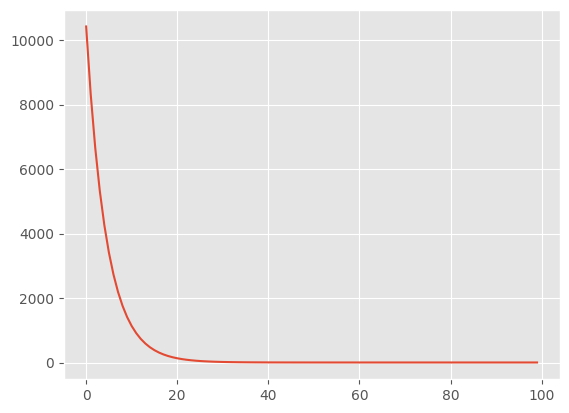

In [49]:
XT = preprocess(XT)
Xt = preprocess(Xt)

print(XT.shape, Xt.shape)

theta = train(XT,yT)
print(theta)

In [50]:
print(theta.shape)

gradient(XT, yT, theta).shape

(11,)


(11,)